# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Actividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**



### **Nombre:**  Marcelo Ismael López Verdugo  

### **Matrícula:**  A00959089

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al. de ELSEVIER, que deberás descargar para contestar varias de las preguntas de esta actividad (el acceso es sin costo alguno):**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [1]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, FunctionTransformer

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore')

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



### ++++++++ Inicia la sección de agregar texto: +++++++++++

Las curvas de aprendizaje son una visualización que permiten evaluar el desempeño de los modelos de aprendizaje automático en función del tamaño de su muestra.  **Las curvas de aprendizaje muestran dos curvas, una de entrenamiento y una de validación**

El comportamiento de las curvas permite diagnosticar el entrenamiento:  
* Subentrenamiento: Las curvas de desempeño de ambas poblaciones se quedan en niveles bajos, aumentar la población para entrenamiento no representa una mejora.  
* Entrenamiento normal: Las curvas de desempeño de ambas poblaciones se acercan mucho e incluso tienen traslape tras cierto tamaño de población.  Si el índice de desempeño utilizado se vuelve convergente para ambas curvas en niveles similares y elevados se puede decir que la generalización y el modelo tiene la complejidad y muestras suficientes.  
* Sobreentrenado:  Las curvas de desempeño entre la población de entrenamiento y validación son diferentes.  Se observa cómo el desepeño es significativamente superior en la población de entrenamiento contra el set de validación.  

Para mejorar el ajuste de los modelo es necesario ajustar la complejidad del mismo o aumentar la cantidad de muestras o iteraciones requeridas para llegar a niveles convergentes y aceptables.  Algunas consideraciones:  
* Convergencia rápida y en nivel bajo:  Posiblemente exista subentrenamiento, aumentar las muestras no representaría una mejora en el desempeño por lo que aumentar la complejidad del modelo es preferible.
*  Convergencia lenta y muy separadas las curvas:  Existe sobre-entrenamiento y quizá sea necesaria la regularización de parámetros o disminuir la complejidad del sistema o modelo.


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al. de ELSEVIER, contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++

El objetivo de la publicación **Predicting social media performance metrics and evaluation of the impact on brand
building: A data mining approach** es el predecir el desempeño de publicaciones de marcas en facebook.  Se extrajeron datos de una página de cosméticos y se utilizaron **790 publicaciones en Facebook** para conseguir un modelo con la capacidad de predecir las 12 métricas de rendimiento.


### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

### Entradas:
*   Page total likes:  Número de personas que están enlazadas a la página
*   Type:  Tipo de contenido (link, foto, status, video)
*   Category:  Caracterización manual de contenido.  Acción (ofertas y concursos),  producto (anuncio directo), inspiración (publicación no directamente relacionada al producto)
*   Post month:  Mes de publicación numerado
*   Post weekday:  Día de la semana de publicación
*   Paid:  Si la compañía pagó la publicidad
*   Hour: Hora de la publicación

### Salidas
*   Lifetime post consumers: Número de personas que hicieron clic en cualquier lugar

### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [2]:
# Cargamos los datos del archivo:

data = pd.read_csv('dataset_Facebook.csv', sep=';', header='infer')
print('Total de registros y variables:',data.shape)
data.head(3).T

Total de registros y variables: (500, 19)


,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Post Hour,3,10,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177


## **Ejercicio 3**

### **Variables temporales**

### **Recordemos que las varaibles temporales pueden tratarse como variables categóricas o numéricas, dependiendo del contexto. En nuestro caso las variables mes, día de la semana y hora en que se puso el post, podríamos considerarlas como variables categóricas ordinales. Sin embargo, para recordar cómo se transforman en cada uno de estos casos (numéricas y categóricas), consideraremos las variables de mes y día de la semana como categóricas ordinales y la variable hora como una variable cíclica.**

### **En la Tabla 3 del artículo de ELSEVIER nos comentan que la variable Post_hour está etiquetada de 0 a 23, por lo que las 24 horas serían las 0 horas, es decir tiene un comportamiento cíclico de 24 horas, que en términos matemáticos se dice que es una variable cíclica módulo 24. Así, las 24 horas será equivalente a las 0 horas**

### **La manera de transformar una variable T cíclica módulo M, es sustituyendo la columna original de la variable T por las siguientes dos columnas. Es lo que se llama ingeniería de características (feature engineering) dentro del área de ciencia de datos:**

$Tsin = sin(2*\pi*T/M)$

$Tcos = cos(2*\pi*T/M)$

#### NOTA: Donde se indica None, podrás agregar las líneas de código que consideres necesarias.

In [3]:
# Ejercicio 3a:

# Define las dos nuevas variables, "horas_sin" y "horas_cos" a partir de la
# variable "Post Hour" y de acuerdo a como se indicó previamente:


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++
M=24
horas_sin = np.sin(2*np.pi*data['Post Hour']/M)
horas_cos = np.sin(2*np.pi*data['Post Hour']/M)

# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++

In [4]:
# Ejercicio 3b:

# Agrega estas dos nuevas variables al DataFrame de tus datos
# y elimina la columna de la variable original "Post Hour":

# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

data['horas_sin']=horas_sin
data['horas_cos']=horas_cos

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


# Veamos lo que tenemos hasta el momento:
data.head(3).T

,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Post Hour,3,10,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177


In [5]:
# De las Tablas 2 y 3 del artículo de ELSEVIER seleccionamos las variables que
# trabajaremos en esta Actividad.

# Separamos los datos de entrada (ver Tabla 3 del artículo) y de la variable de salida (ver Tabla 2):
X = data[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Paid', 'horas_sin', 'horas_cos']]
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de ELSEVIER.


# Particionamos en Train, Validation y Test en 70-15-15:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=7)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (350, 8) (350, 1)
Val: (75, 8) (75, 1)
Test: (75, 8) (75, 1)


In [6]:
Xtrain.describe(include='all').T   # Veamos alguna descripción como datos numéricos del conjunto de entrenamiento.
                                   # En particular, las desviaciones estándar (std) desplegadas son las muestrales.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Page total likes,350.0,NaN,NaN,NaN,123412.534286,16145.534825,81370.0,111972.0,129600.0,136393.0,139441.0
Type,350,4,Photo,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,350.0,NaN,NaN,NaN,1.9,0.862295,1.0,1.0,2.0,3.0,3.0
Post Month,350.0,NaN,NaN,NaN,7.088571,3.309383,1.0,4.0,7.0,10.0,12.0
Post Weekday,350.0,NaN,NaN,NaN,4.151429,2.047414,1.0,2.0,4.0,6.0,7.0
Paid,349.0,NaN,NaN,NaN,0.286533,0.452791,0.0,0.0,0.0,1.0,1.0
horas_sin,350.0,NaN,NaN,NaN,0.443653,0.45043,-1.0,0.258819,0.5,0.707107,1.0
horas_cos,350.0,NaN,NaN,NaN,0.443653,0.45043,-1.0,0.258819,0.5,0.707107,1.0


### **Ajuste variable categórica en Pipeline**

#### **Veamos un ejemplo de cómo ajustar una variable categórica en la cual uno de sus niveles no tiene suficiente información, por ejemplo, que no tenga al menos un 5% de información cada nivel. Entonces reagruparemos los niveles más pequeños hasta obtener un 5% y esto mediante una función que podamos usar dentro del Pipeline, para evitar el filtrado de información.**

In [7]:
# Obtengamos las etiquetas únicas de data['Type'] ordenadas de mayor a menor frecuencia:
Xtrain['Type'].unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [8]:
Xtrain['Type'].value_counts() / Xtrain.shape[0]   # Siguiendo la política de que cada nivel de una variable tenga
                                                  # al menos el 5% de información, agruparemos los casos "Link"
                                                  # y "Video" en un nuevo nivel que podría interpretarse como "Otros".

Type
Photo     0.860000
Status    0.082857
Link      0.045714
Video     0.011429
Name: count, dtype: float64

In [9]:
# Definimos la función que llevará a cabo esta transformación dentro del Pipeline:

def mi_type(x):
  x = x.values.ravel()  # Convertimos a un arreglo 1D
  x = pd.Series(x, name='Type')  # seleccionamos la columna como datos tipo Series
  x.loc[:] = x.map({'Photo':1, 'Status':2, 'Link':0, 'Video':0})  # Podrías etiquetarlos también como 3, en lugar de 0.
  return x.values.reshape(-1, 1)    # Ajustamos la dimensión a un vector columna.

### **Transformación en la Variable de Salida**



In [10]:
ytrain.describe().T   # Información de la variable de salida.

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,350.0,780.517143,770.963085,9.0,336.75,543.0,959.0,5934.0


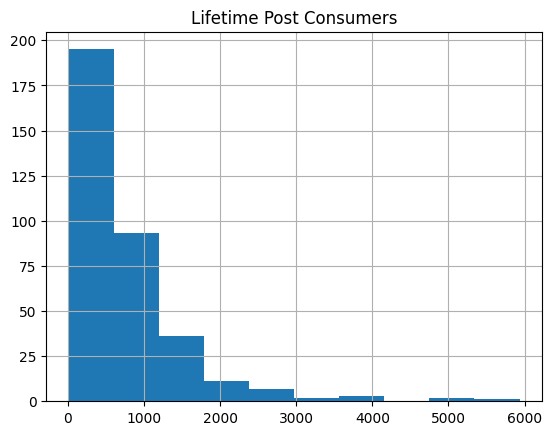

In [11]:
# Observamos a continuación que hay un claro sesgo positivo en la variable de salida:
ytrain.hist();

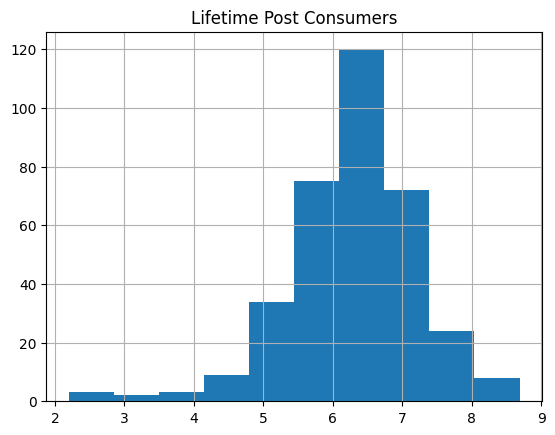

In [12]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [13]:
# Para una primera aproximación, podemos decir que se ajusta de manera aceptable
# la distribución con logaritmo a una acampanada.
# Procedemos entonces de la misma manera con Val y Test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [14]:
# Aplicaremos lo mínimo de transformaciones.
# Las nuevas variables horas_sin y horas_cos ya están escaladas entre -1 y +1, por
# lo que podemos dejarlas así y solamente cuidar sus posibles datos perdidos.

num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ('scaler', MinMaxScaler())
                             ])
num_pipe_nombres = [0]   # ['Page total likes']  puedes indicar solamente el índice de la columna.


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4]   # ['Post Month', 'Post Weekday']


# Transformación del factor categórico de entrada "Type":
catMap_pipe = Pipeline(steps = [('catMap', FunctionTransformer(mi_type))])
catMap_pipe_nombres = ['Type']


# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('NomImp', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,5]  # ['Type', 'Category', 'Paid']


# Variables numéricas con la hora:
hora_pipe = Pipeline(steps = [('HoraImp', SimpleImputer(strategy='mean'))])
hora_pipe_nombres = [6,7]   # ['horas_sin', 'horas_cos']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres),
                                                        ('catmap', catMap_pipe, catMap_pipe_nombres),
                                                        ('hora', hora_pipe, hora_pipe_nombres)
                                                        ],
                                        remainder='passthrough')



# Solo para saber la nueva cantidad de columnas después de las trasnformaciones:
XtrainT = columnasTransformer.fit_transform(Xtrain)  # Ajustamos con Train...
print('Variables de entrada original:', Xtrain.shape)
print('Variables de entrada transformadas:', XtrainT.shape)

Variables de entrada original: (350, 8)
Variables de entrada transformadas: (350, 12)


### **Criterio para determinar si un modelo está subentrenado en un problema de Regresión:**

In [15]:
# Existen varios criterios para determinar si un modelo de regresión está
# subentrenado, veamos a continuación unos de ellos.

# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std(ddof=1))        # Usemos la desviación estándar muestral
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std(ddof=1))    # ajustando los grados de libertad.

Desv-Est y-original: 770.963
Desv-Est y-logaritmo: 0.916


#### **Recordemos que la desviación estándar está en las mismas unidades de la variable original, por lo que en este caso tendríamos que la desviación estándar nos habla de aproximadamente 771 personas que dieron click en alguna parte del post.**

#### **En esta activiad estaremos comparando los errores en términos del logaritmo de la variable de salida, por lo que nuestro valor de referencia será el valor que obtienes en Desv_Est y_logaritmo=0.916 (aproximadamente). Así, los errores RMSE de los valores de predicción y los reales de los modelos que estarás obteniendo, deberán ser menores a este valor para no considerarlos subentrenados.**

#### **NOTA sobre los grados de libertad ddof (delta degree of freedom):**

Ver documentación: https://numpy.org/doc/stable/reference/generated/numpy.std.html

#### **Estricamente, desde el punto de vista matemático las desviaciones estándar que uno calcula deben ser las muestrales, es decir, std(ddof=1). Sin embargo, en la práctica es muy común usar la función con su valor predeterminado que es ddof=0 y que se traduce a calcular la desviación estándar poblacional. Repito, en la práctica suele pasarse por alto este ajuste porque cuando se tienen datos de miles o más regitros, la diferencia entre el resultado problacional y el muestral es mínima. En esta actividad lo pongo solamente para recordarlo y en dado caso cuando tengas menos de 100 registros sí hacer este ajuste, porque la diferencia entre ambos ya podría ser importante.**

In [16]:
# Como se va a utilizar Validación-Cruzada, concatenamos los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainvallog = pd.concat([ytrainlog, yvallog], axis=0)

## **Ejercicio 4**


/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/prep

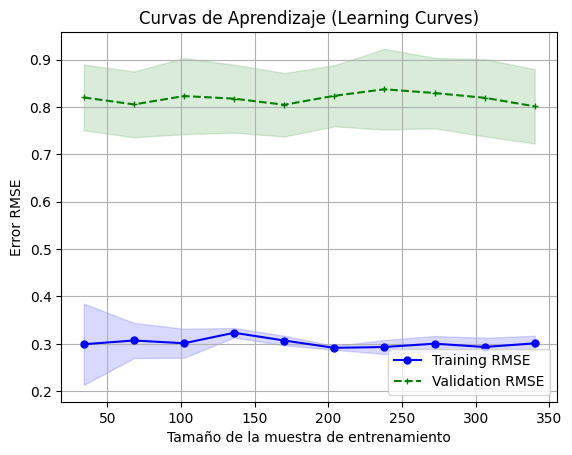

In [17]:
# Ejercicio 4a.

# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor()

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)   # aquí también hacemos el ajuste de la desviación estándar muestral.
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje (Learning Curves)')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()


/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/prep

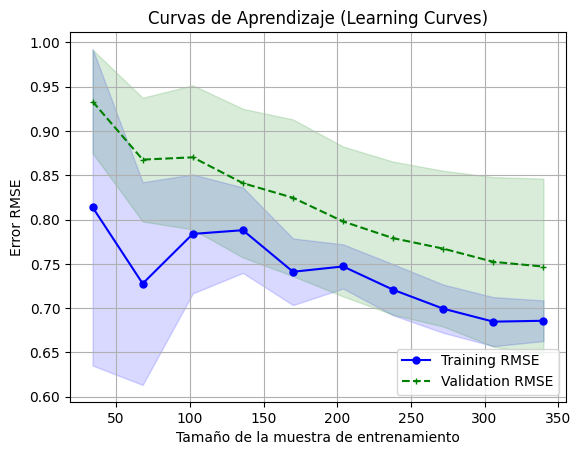

In [ ]:
#  El modelo está en "Overfitting"


elmodelo_RF = RandomForestRegressor(n_estimators=100,  # Número de árboles
                                    max_depth=10,  # Limite de profundidad
                                    min_samples_split=10,  # Aumento de complejidad
                                    min_samples_leaf=8,  # Aumento en muestras de hojas
                                    max_features='sqrt',  # Raiz cuadrada
                                    random_state=42,
                                    n_jobs=-1)


# Ejecutando modelo:


mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)   
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje (Learning Curves)')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [21]:
# Ejercicio 4b.

# Una vez que verifiques que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de tus mejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators=100,  # Número de árboles
                                    max_depth=10,  # Limite de profundidad
                                    min_samples_split=10,  # Aumento de complejidad
                                    min_samples_leaf=8,  # Aumento en muestras de hojas
                                    max_features='sqrt',  # Raiz cuadrada
                                    random_state=42,
                                    n_jobs=-1)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++


mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.725


## **Ejercicio 5**

### **Repite el mismo proceso del Ejercicio 4 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenados, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

XG Boost

/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/prep

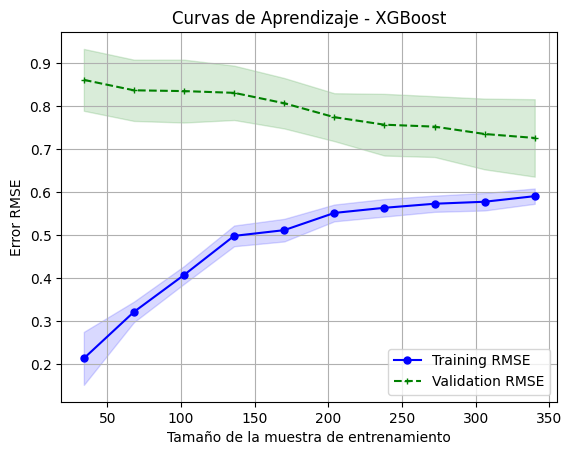

Error RMSE (Test) de XGBoost: 0.666


In [ ]:
# Incluye a continuación las celdas y líneas de código que consideres necesarias
# para responder el Ejercicio 5a, 5b y 5c.

# Modelo inicial de XGBoost con hiperparámetros base
elmodelo_XGB = XGBRegressor(
    n_estimators=1000,      # Número de árboles
    max_depth=2,           # Profundidad máxima del árbol, se limtó para reducir complejidad y evitar sobre entrenamiento
    learning_rate=0.01,     # Tasa de aprendizaje (step size)
    subsample=0.7,         # Fracción de datos usados en cada árbol
    colsample_bytree=0.7,  # Fracción de características utilizadas en cada árbol
    random_state=42,
    n_jobs=-1
)

# Se ejecuta el pipeline con el modelo inicial
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_XGB)])

train_sizes, train_scores, val_scores = learning_curve(
    estimator=mipipe,
    X=Xtrainval,
    y=np.ravel(ytrainvallog),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Cálculo de RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)

# Graficamos las curvas de aprendizaje del modelo inicial de XGBoost
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje - XGBoost')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()



mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_XGB)])
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_XGB = mipipe.predict(Xtest)

print('Error RMSE (Test) de XGBoost: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_XGB)))

SVM

/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/prep

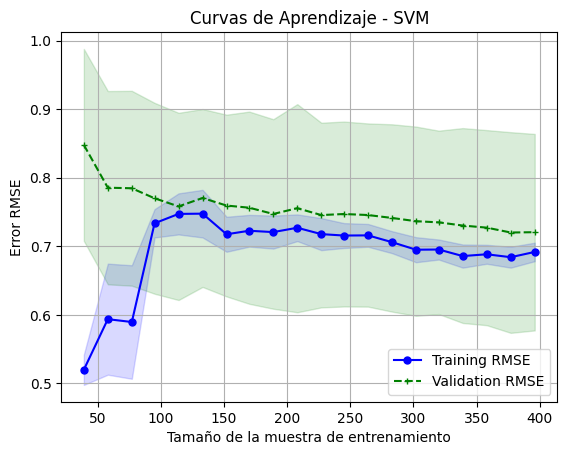

Error RMSE (Test) de SVM: 0.740


In [33]:
# Modelo inicial de SVM con hiperparámetros básicos
elmodelo_SVM = SVR(kernel='rbf', C=10, epsilon=0.01)

# Se ejecuta el pipeline con el modelo inicial
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_SVM)])

train_sizes, train_scores, val_scores = learning_curve(
    estimator=mipipe,
    X=Xtrainval,
    y=np.ravel(ytrainvallog),
    cv=15,
    train_sizes=np.linspace(0.1, 1.0, 20),
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Cálculo de RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)

# Graficamos las curvas de aprendizaje del modelo inicial de SVM
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje - SVM')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# +++++++++++++ Termina sección de realizar ajustes +++++++++++++++++++++

# Se crea el pipeline con el modelo SVM ajustado
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_SVM)])

# Entrenamos el modelo en el conjunto de entrenamiento validación
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))

# Hacemos predicciones en el conjunto de prueba
yhattest_SVM = mipipe.predict(Xtest)

# Calculamos el RMSE en Test
rmse_test_svm = np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_SVM))
print('Error RMSE (Test) de SVM: %.3f' % rmse_test_svm)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-package

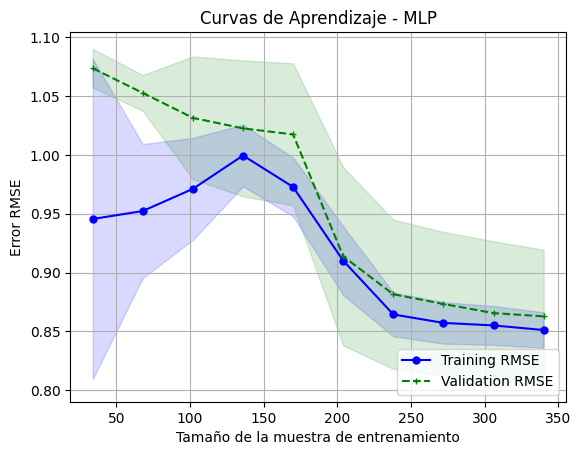

Error RMSE (Test) de MLP: 0.754


In [36]:
# Modelo inicial de MLP con hiperparámetros básicos
elmodelo_MLP = MLPRegressor(hidden_layer_sizes=(50,), activation='logistic', solver='adam',
                            max_iter=500, random_state=42, early_stopping=False)

# Se ejecuta el pipeline con el modelo inicial
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_MLP)])

train_sizes, train_scores, val_scores = learning_curve(
    estimator=mipipe,
    X=Xtrainval,
    y=np.ravel(ytrainvallog),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10, 40),
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Cálculo de RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)

# Graficamos las curvas de aprendizaje del modelo inicial de MLP
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje - MLP')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Se crea el pipeline con el modelo MLP ajustado
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_MLP)])

# Entrenamos el modelo en el conjunto de entrenamiento validación
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))

# Hacemos predicciones en el conjunto de prueba
yhattest_MLP = mipipe.predict(Xtest)

# Calculamos el RMSE en Test
rmse_test_mlp = np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_MLP))
print('Error RMSE (Test) de MLP: %.3f' % rmse_test_mlp)

## **Ejercicio 6**

### **Importancia de características**

#### **Ejercicio 6a.**

*   **Con base al mejor modelo encontrado, realiza una análisis de importancia de características con el conjunto de prueba (Test).**

*   **Obtener un diagrama de cajas o algún tipo de visualización para mostrar estos resultados.**


#### **Ejercicio 6b.**

*   **Con base a los gráficos obtenidos indica cuáles son los tres factores más importantes y que dan mayor información para la predicción de la variable de salida.**

*  **Compara tus resultados con el resultado de la Figura 6 del artículo de ELSEVIER. Indica tus coincidencias y diferencias.**

In [ ]:
# ++++++++++++++ Incluye aquí tu código +++++++++++++++++++++++++++++++
# Ejercicio 6a.


#  Mejor modelo encontrado: XGBoost
elmodelo_XGB = XGBRegressor(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.6,
    random_state=42,
    n_jobs=-1
)

# Aplicamos la transformación a los datos antes de entrenar el modelo
Xtrain_transformed = columnasTransformer.fit_transform(Xtrainval)

# Obtenemos los nombres de las características después de la transformación
try:
    feature_names=columnasTransformer.get_feature_names_out()
except:
    # Manualmente
    feature_names = []
    for name, transformer, cols in columnasTransformer.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            feature_names.extend(transformer.get_feature_names_out(cols))
        else:
            feature_names.extend(cols)

# Convertimos el array transformado en un DataFrame con nombres de columnas correctos
Xtrain_transformed_df = pd.DataFrame(Xtrain_transformed, columns=feature_names)

# Convertimos todas las columnas a tipo numérico para evitar errores en XGBoost
Xtrain_transformed_df = Xtrain_transformed_df.apply(pd.to_numeric, errors='coerce')

# Eliminamos columnas con valores NaN generados por la conversión, si los hay
Xtrain_transformed_df = Xtrain_transformed_df.dropna(axis=1, how='all')

# Entrenamos XGBoost con los datos transformados corregidos
elmodelo_XGB.fit(Xtrain_transformed_df, np.ravel(ytrainvallog))

# Extraemos la importancia de características
importances = elmodelo_XGB.feature_importances_

# Convertimos en DataFrame para visualizar mejor
importance_df = pd.DataFrame({'Feature': Xtrain_transformed_df.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#  Gráfico de Importancia de Características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de Características en XGBoost')
plt.show()

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++

ValueError: input_features is not equal to feature_names_in_

### ++++++++ Inicia la sección de agregar texto: +++++++++++
### **Ejercicio 6b**

None


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 7**

### **Incluye tus conclusiones finales de la Actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


None


### ++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de la Semana 7**